This file defines a neural network for classifying newswires from the 1986 reuters dataset into one of 46 classes. The code and concept are taken from the book "Deep Learning with Python" by Francois Chollet. The purpose behind the existence of this file is purely educational.

In [2]:
# loading the reuters dataset

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print('compleet')

compleet


D:\Programs\Miniconda3\envs\myenv\lib\site-packages\keras\datasets\reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
D:\Programs\Miniconda3\envs\myenv\lib\site-packages\keras\datasets\reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
import numpy as np

# takes a list of sequences then turns it into a single matrix, where each vector in the matrix represents its corresponding list 
# with zeroes in all indicies except for 1s in the indices for the numbers in the list
def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences),dimension))
    
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
# to encode the label data, one hot encoding will be used

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

With a stack of dense layers, each layer only has access to information in the output of the previous layer, so layers could become information bottlenecks if they leave out relevant information about the data while processing, coz this information is then lost for subsequent layers. This is more likely to happen with the small layers previously used in this case since the number of output classes is much larger, so a hidden layer dimension of 64 will be used instead of 16.

In [6]:
# defining the keras model

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [10]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 4s 440us/step - loss: 2.5638 - accuracy: 0.4961 - val_loss: 1.6750 - val_accuracy: 0.6310
Epoch 2/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.3721 - accuracy: 0.7134 - val_loss: 1.2884 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 147us/step - loss: 1.0266 - accuracy: 0.7831 - val_loss: 1.1245 - val_accuracy: 0.7560
Epoch 4/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.8133 - accuracy: 0.8302 - val_loss: 1.0510 - val_accuracy: 0.7770
Epoch 5/20
7982/7982 [==============================] - 1s 147us/step - loss: 0.6488 - accuracy: 0.8636 - val_loss: 0.9754 - val_accuracy: 0.8060
Epoch 6/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.5216 - accuracy: 0.8914 - val_loss: 0.9823 - val_accuracy: 0.8060
Epoch 7/20
7982/7982 [==============================] - 1s 148us/step - loss

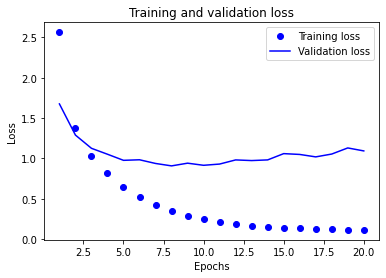

In [11]:
#graphing loss in training and validation sets against epochs

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()